# Home Depot Real Data Analysis
This notebook uses **real publicly available data** on Home Depot's revenue, comparable sales, and online sales footprint to illustrate a simple, intern-scaled analytics project.

## 1. Setup
We manually encode key figures pulled from:
- WallStreetZen / Macro-style sites for annual revenue (compiled from SEC filings)
- Home Depot 2023 and 2024 Annual Reports for comparable sales
- Home Depot 2022 Annual Report for online share (14.2% of net sales)
- ECDB retailer profile for HomeDepot.com GMV in 2024

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Annual revenue (billions USD)
hd_sales = pd.DataFrame({
    'Year': [2021, 2022, 2023, 2024, 2025],
    'Revenue_B': [132.11, 151.16, 157.40, 152.67, 159.51]
})
hd_sales

,Year,Revenue_B
0,2021,132.11
1,2022,151.16
2,2023,157.40
3,2024,152.67
4,2025,159.51


In [2]:
# Comparable sales (%)
hd_comps = pd.DataFrame({
    'Period': ['2023 Full Year', '2024 Full Year', 'Q4 2024', 'Q3 2025'],
    'Metric': ['Comparable sales', 'Comparable sales', 'Comparable store sales', 'Comparable sales'],
    'Comp_Sales_Pct': [-3.2, -1.8, 0.8, 0.2]
})
hd_comps

,Period,Metric,Comp_Sales_Pct
0,2023 Full Year,Comparable sales,-3.2
1,2024 Full Year,Comparable sales,-1.8
2,Q4 2024,Comparable store sales,0.8
3,Q3 2025,Comparable sales,0.2


In [3]:
# Online sales estimates
online_2022_total_sales = 157.4  # billions USD
online_2022_share = 0.142
online_2022_sales = online_2022_total_sales * online_2022_share

hd_online = pd.DataFrame({
    'Year': [2022, 2024],
    'Online_Sales_B': [round(online_2022_sales, 2), 21.099],
    'Source_Notes': [
        '14.2% of 2022 net sales (~157.4B) from HD 2022 Annual Report',
        'HomeDepot.com GMV from ECDB retailer profile'
    ]
})
hd_online

,Year,Online_Sales_B,Source_Notes
0,2022,22.350,14.2% of 2022 net sales (~157.4B) from HD 2022...
1,2024,21.099,HomeDepot.com GMV from ECDB retailer profile


## 2. Visualizations

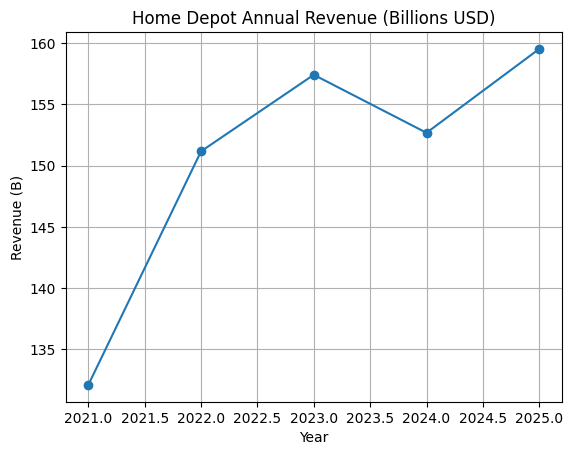

In [4]:
# Revenue trend
plt.figure()
plt.plot(hd_sales['Year'], hd_sales['Revenue_B'], marker='o')
plt.title('Home Depot Annual Revenue (Billions USD)')
plt.xlabel('Year')
plt.ylabel('Revenue (B)')
plt.grid(True)
plt.show()

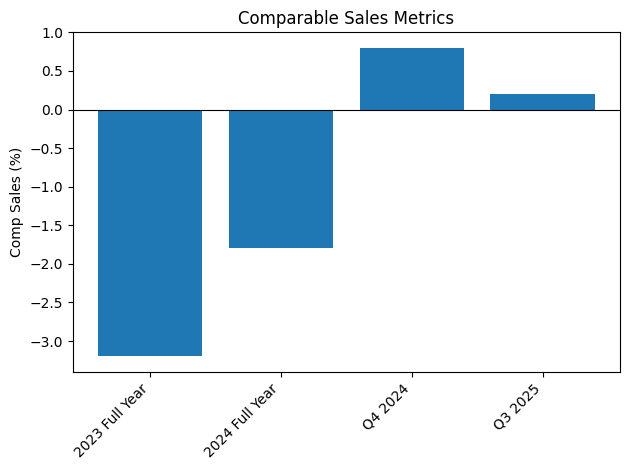

In [5]:
# Comparable sales trend (simple bar chart)
plt.figure()
plt.bar(hd_comps['Period'], hd_comps['Comp_Sales_Pct'])
plt.title('Comparable Sales Metrics')
plt.ylabel('Comp Sales (%)')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

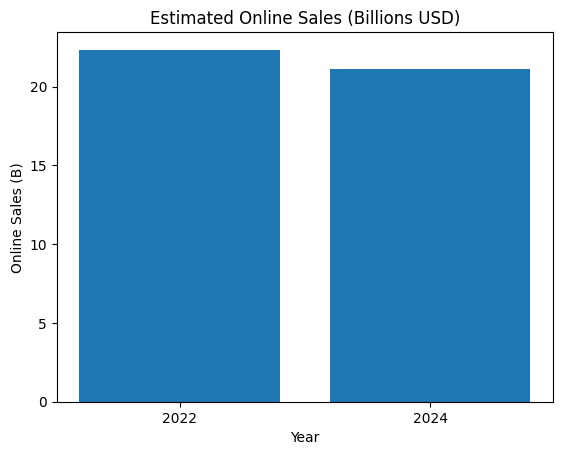

In [6]:
# Online sales comparison
plt.figure()
plt.bar(hd_online['Year'].astype(str), hd_online['Online_Sales_B'])
plt.title('Estimated Online Sales (Billions USD)')
plt.ylabel('Online Sales (B)')
plt.xlabel('Year')
plt.show()

## 3. Simple Derived Insights
From these charts, you can narrate:
- Revenue stepped up sharply through 2022 and 2023, then dipped in 2024 before recovering in 2025.
- Comparable sales were negative in 2023 and 2024, with only modest positive quarters in late 2024 and 2025.
- Online sales are large (low-20B range) but not obviously accelerating, suggesting room to use analytics to drive more resilient, everyday demand rather than relying heavily on macro or storm-driven spikes.
